<a href="https://colab.research.google.com/github/glorykim999910/aiacademy/blob/master/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C%ED%95%A8%EC%88%98%20%EB%B0%8F%20KMEAN%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%20%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

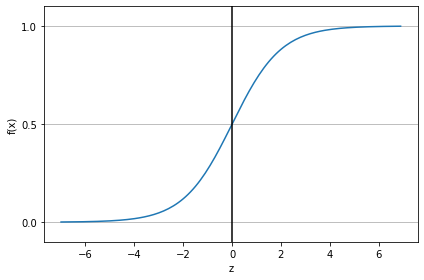

In [12]:
# 시그모이드 함수구현

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0+np.exp(-z))

z = np.arange(-7,7,0.1)
f_x = sigmoid(z)

plt.plot(z, f_x)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('f(x)')

plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

## k-평균 4단계 알고리즘(유사도측정)
1. 데이터 포인트에서 랜덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택
2. 각 데이터를 가장 가까운 센트로이드에 할당
3. 할당된 샘플들의 중심으로 센트로이드를 이동
4. 클러스터 할당이 불변하거나, 사용자가 지정한 허용오차나 최대 반복횟수에 도달할때까지 2,3과정을 반복

* 클러스터 내의 제곱 오차합(SSE)를 반복적으로 최소화하도록 센트로이드가 이동!!
  * 유클리디언 거리알고리즘
  * 데이터가 클러스터내 존재하면 1, 아니면 0
* 왜곡문제해결 : 거리산출시 불필요특성제거와 표준화가 필요

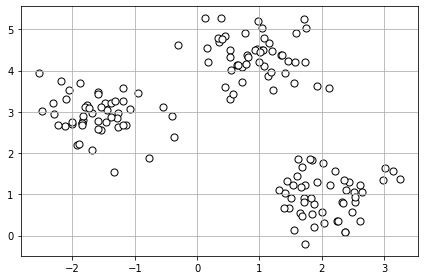

In [17]:
# 군집분석 k평균


from sklearn.datasets import make_blobs

# 무작위 데이터셋 생성
X,y = make_blobs(n_samples = 150, # 150개
                 n_features  = 2, # 2차원
                 centers = 3, # 3개의 클러스터 혹은 중심
                 cluster_std = 0.5, # 클러스터의 표준편차  ,
                 shuffle = True , # 무작위
                 random_state=0 # 시드값 = 0
                 
          
                 )

import matplotlib.pyplot as plt

# 2차원 산점도 만들기
plt.scatter(X[:,0],  
            X[:,1], 
            c = 'white',
            marker = 'o',
            edgecolor = 'black',
            s = 50 )


plt.grid()
plt.tight_layout()
plt.show()



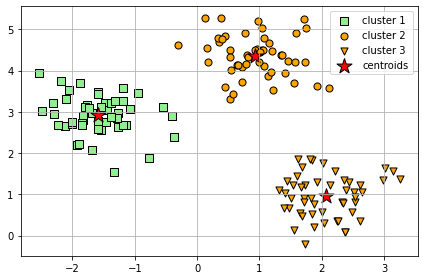

In [19]:
from sklearn.cluster import KMeans
# KMeans알고리즘 객체화 
km = KMeans(n_clusters = 3, # 클러스터수 = 3 
            init = 'random', # 기본 k평균설정
            n_init = 10, # 독립적으로 가장 낮은 sse 요구이후 선택
            max_iter = 300,  # 2,3과정 최대반복수
            tol = 1e-04, # 허용오차값 
            random_state = 0) 

y_km = km.fit_predict(X) # 무작위데이터에 예측 클러스터레이블에 적용

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50, c='lightgreen',
            marker = 's', edgecolor ='black',
            label ='cluster 1')

plt.scatter(X[y_km == 1,0],
            X[y_km == 1,1],
            s = 50, c= 'orange',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 2'
            )
            

plt.scatter(X[y_km == 2,0],
            X[y_km == 2,1],
            s = 50, c= 'orange',
            marker = 'v', edgecolor = 'black',
            label = 'cluster 3'
            )


plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s = 250, c= 'red',
            marker = '*', edgecolor = 'black',
            label = 'centroids'
            )


plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


# KMeans의 가정
# 1. 클러스터가 중첩X
# 2. 계층적 X
# 3. 클러스터당 하나 이상의 데이터





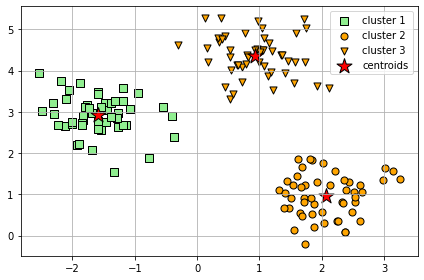

In [25]:
# KMeans++ : 초기 센트로이드의 할당 문제를 해결

km = KMeans(n_clusters=3,  # k값을 자주 바꿔보기!! 엘보우 방법
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state=0
            )

y_km = km.fit_predict(X) # 무작위데이터에 예측 클러스터레이블에 적용

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50, c='lightgreen',
            marker = 's', edgecolor ='black',
            label ='cluster 1')

plt.scatter(X[y_km == 1,0],
            X[y_km == 1,1],
            s = 50, c= 'orange',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 2'
            )
            

plt.scatter(X[y_km == 2,0],
            X[y_km == 2,1],
            s = 50, c= 'orange',
            marker = 'v', edgecolor = 'black',
            label = 'cluster 3'
            )


plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s = 250, c= 'red',
            marker = '*', edgecolor = 'black',
            label = 'centroids'
            )


plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()




In [26]:
# 군집평가 : 클러스터내 오차제곱합을 비교! sklearn 라이브러리

print('왜곡 : %.2f' % km.inertia_)

왜곡 : 72.48


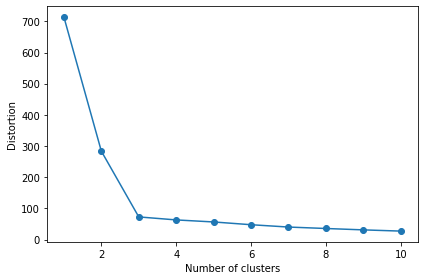

In [31]:
distortions = []

for i in range(1,11):
  km = KMeans(n_clusters=i,
              init = 'k-means++',
              n_init = 10,
              max_iter = 300,
              random_state = 0)
  
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker = 'o') # x축 k범위 , y는 왜곡값
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show() # 팔꿈치 형상 엘보우방법


## 실루엣 그래프
### 클러스터 내 데이터들이 얼마나 조밀하게 모여있는지를 측정하는 그래프 도구 

1. 하나의 임의의 데이터와 동일한 클러스터내의 모든 다른 데이터 포인트 사이의 거리를 평균하여 클러스터 응집력을 계산
2. 앞서 선정한 데이터와 가장 가까운 클러스터의 모든 샘플간 평균거리로 최근접 클러스터의 클러스터 분리도C를 계산
3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰값으로 나눠 실루엣 계수를 계산

* 응집력 = 분리도 : 0
* 응집력 < 분리도 : 1


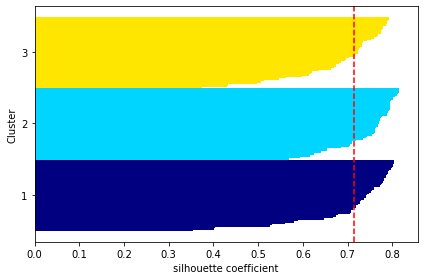

In [42]:
# k = 3 클러스터의 확인가능 / 이상치 확인가능 / 군집여부확인가능 / 붉은 색 점선 : 평균실루엣개수

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters = 3, 
            init ='k-means++',
            n_init = 10,
            max_iter=300,
            tol = 1e-04,
            random_state = 0
            )
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
           edgecolor ='none', color = color)
  

  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = "--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')

plt.tight_layout()
plt.show()






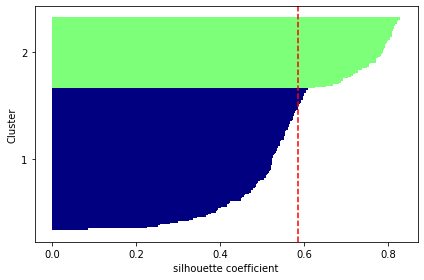

In [43]:
# k = 2 클러스터

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters = 2, 
            init ='k-means++',
            n_init = 10,
            max_iter=300,
            tol = 1e-04,
            random_state = 0
            )
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
           edgecolor ='none', color = color)
  

  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = "--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')

plt.tight_layout()
plt.show()


# 만약 k =2인 클러스터와 비교하면, 각 클러스터에 대한 그래프의 두께와 길이가 다르고, 최적의 군집결과를 도출하지 못함